In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

browser = Browser('chrome')

# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [2]:
# Create a Beautiful Soup Object
html = browser.html
mars = BeautifulSoup(html, "html.parser")

In [3]:
# Extract all rows of data
rows = mars.find_all("tr", class_="data-row")
rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

In [4]:
# Create an empty list
data = []
# Loop through the scraped data to create a list of rows
for info in rows:
    text = info.text.strip()
    clean = text.replace("\n", ",")
    data.append(clean)
    
data

['2,2012-08-16,10,155,6,-75.0,739.0',
 '13,2012-08-17,11,156,6,-76.0,740.0',
 '24,2012-08-18,12,156,6,-76.0,741.0',
 '35,2012-08-19,13,157,6,-74.0,732.0',
 '46,2012-08-20,14,157,6,-74.0,740.0',
 '57,2012-08-21,15,158,6,-78.0,740.0',
 '68,2012-08-22,16,158,6,-77.0,740.0',
 '79,2012-08-23,17,159,6,-76.0,742.0',
 '112,2012-08-27,21,161,6,-74.0,741.0',
 '114,2012-08-28,22,162,6,-74.0,742.0',
 '123,2012-08-29,23,162,6,-75.0,741.0',
 '134,2012-08-30,24,163,6,-75.0,742.0',
 '145,2012-08-31,25,163,6,-75.0,743.0',
 '156,2012-09-01,26,164,6,-76.0,745.0',
 '163,2012-09-02,27,164,6,-75.0,743.0',
 '170,2012-09-03,28,165,6,-75.0,745.0',
 '171,2012-09-04,29,166,6,-75.0,747.0',
 '172,2012-09-05,30,166,6,-74.0,747.0',
 '173,2012-09-06,31,167,6,-74.0,745.0',
 '175,2012-09-08,33,168,6,-73.0,748.0',
 '176,2012-09-10,34,168,6,-73.0,748.0',
 '177,2012-09-11,35,169,6,-73.0,749.0',
 '178,2012-09-12,36,169,6,-73.0,750.0',
 '179,2012-09-13,37,170,6,-73.0,750.0',
 '180,2012-09-14,38,171,6,-73.0,750.0',
 '181,201

In [42]:
# Create Pandas DataFrame
mars_df = pd.DataFrame(data)
mars_df = mars_df[0].str.split(",", expand=True)
mars_df[["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]] = mars_df
mars_df_clean = mars_df.drop(columns = [0, 1, 2, 3, 4, 5, 6])
# Confirm DataFrame was created successfully
mars_df_clean

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [44]:
#Examine data type of each column
mars_df_clean.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [170]:
#Change data types for data analysis
mars_df_clean["sol"] = mars_df_clean["sol"].astype('int64')
mars_df_clean["ls"] = mars_df_clean["ls"].astype('int64')
mars_df_clean["month"] = mars_df_clean["month"].astype('int64')
mars_df_clean["min_temp"] = mars_df_clean["min_temp"].astype('float64')
mars_df_clean["pressure"] = mars_df_clean["pressure"].astype('float64')

In [127]:
#Confirm type changes were successful
mars_df_clean.dtypes

id                   object
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [133]:
#Months on Mars
mars_df_clean["month"].value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [136]:
#Martian days' worth of data
mars_df_clean["sol"].count()

1867

In [141]:
#Average low temperature by month
temp_by_month = mars_df_clean.groupby(["month"]).mean()["min_temp"]
temp_by_month

/var/folders/nf/mdxt63n15r5_l8m95ry9byp40000gn/T/ipykernel_50634/1880841751.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_by_month = mars_df_clean.groupby(["month"]).mean()["min_temp"]


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0.5, 0, 'Month')

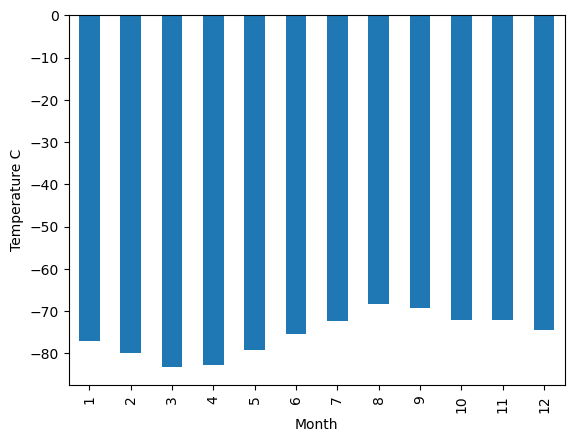

In [147]:
#Plot average temperature by month
temp_by_month.plot(kind="bar")
plt.ylabel("Temperature C")
plt.xlabel("Month")

Text(0.5, 0, 'Month')

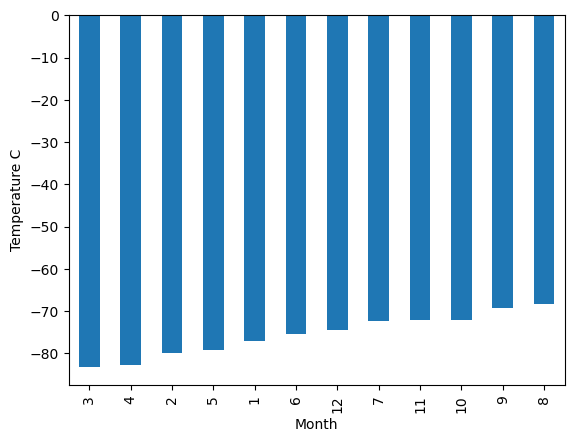

In [156]:
#Identify the coldest and hottest months in Curiosity's location
temp_by_month.sort_values(ascending=True).plot(kind='bar')
plt.ylabel("Temperature C")
plt.xlabel("Month")

In [159]:
#Average pressure by Martian month
pressure_by_month = mars_df_clean.groupby(["month"]).mean()["pressure"]
pressure_by_month

/var/folders/nf/mdxt63n15r5_l8m95ry9byp40000gn/T/ipykernel_50634/1448395745.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pressure_by_month = mars_df_clean.groupby(["month"]).mean()["pressure"]


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0.5, 0, 'Month')

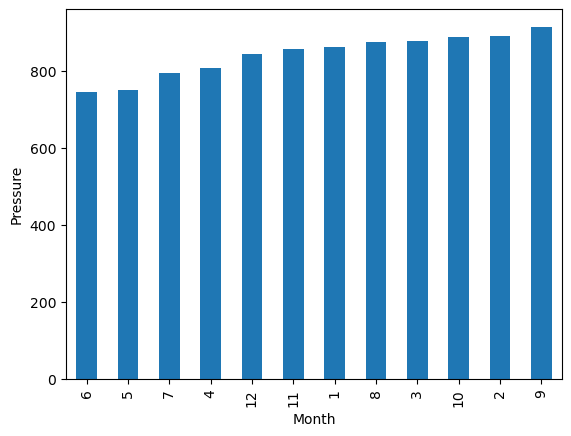

In [163]:
# Plot average pressure by month
pressure_by_month.sort_values(ascending=True).plot(kind="bar")
plt.ylabel("Pressure")
plt.xlabel("Month")

Text(0.5, 0, '# of Terrestrial Days')

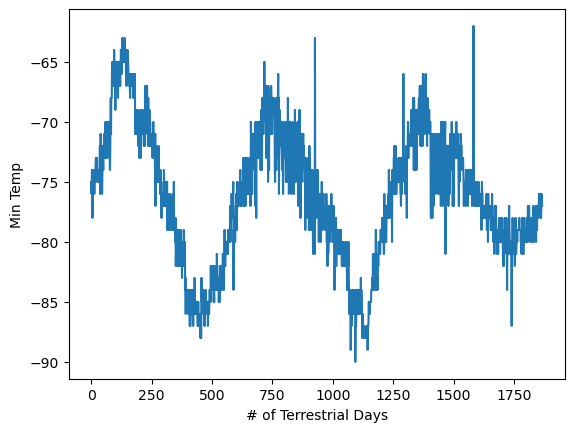

In [166]:
#Terrestrial (earth) days in a Martian year
mars_df_clean["min_temp"].plot()
plt.ylabel("Min Temp")
plt.xlabel("# of Terrestrial Days")

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot.

In [169]:
# Write the data to a CSV
mars_df_clean.to_csv("mars_data.csv", index=False)

In [168]:
browser.quit()